In [1]:
%help

Welcome message.
Lorem ipsum dolor sit amet.


In [1]:
%status

My node ID: 0x4a74cbb0b48261e72fb13c714408f965f56b6252
My wallet address: 0x4a74cbb0b48261e72fb13c714408f965f56b6252
On Polygon[mainnet]: 0.00 GLM 0.0000 MATIC
On Rinkeby[testnet]: 999.84 tGLM 0.0215 tETH
Connection status: Disconnected



In [2]:
%budget rinkeby 1

Allocated 1 tglm on rinkeby

In [ ]:
%connect timeout=15m

Progress: 1/3
    Demand created. Waiting for counter proposal.
    Searching for just any machine...
    Will try to connect for 15 minutes.
Progress: 2/3
    Agreement created.
    Connected to imapp2035-3060-1 [0x85f08a865abc7adf5f56754cd390a951406439eb]
    RAM: 6.589084774255753 GB
    DISK: 200.6771881103516 GB
    CPU: 4 cores
    GPU: GA106 [GeForce RTX 3060 Lite Hash Rate]
Progress: 3/3
    Engine is starting...


In [4]:
%pip install matplotlib pandas










Note: you may need to restart the kernel to use updated packages.


In [5]:
%upload life_expectancy.csv

Sending...
File uploaded.


In [10]:
!lspci -vnn | grep VGA

00:02.0 VGA compatible controller [0300]: Device [1234:1111] (rev 02) (prog-if 00 [VGA controller])
00:05.0 VGA compatible controller [0300]: NVIDIA Corporation Device [10de:2504] (rev a1) (prog-if 00 [VGA controller])


In [12]:
!nvidia-smi

Wed May 10 18:12:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.60.02    Driver Version: 510.60.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:00:05.0 Off |                  N/A |
|  0%   58C    P0    33W / 170W |      0MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060'

In [6]:
import numpy as np
import pandas as pd
import random
import torch
from torch.autograd import Variable

training_df = pd.read_csv(filepath_or_buffer="workdir/life_expectancy.csv")

#training_df['median_house_value'] /= 1000.0

# create dummy data for training
# x_values = list(training_df[training_df.Country=="Poland"]['Year'])
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

# y_values = list(training_df[training_df.Country=="Poland"]['Life expectancy '])
y_values = [2*i + 1 + random.randint(-4,4) for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()
    
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [7]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(111.2300, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 111.2300033569336
tensor(14.8009, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 14.800948143005371
tensor(6.9183, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 6.9183478355407715
tensor(6.2584, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 6.258393287658691
tensor(6.1878, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 6.187756061553955
tensor(6.1654, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 6.165377140045166
tensor(6.1471, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 6.14711856842041
tensor(6.1294, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 6.129382133483887
tensor(6.1119, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 6.111867904663086
tensor(6.0946, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 6.094551086425781
tensor(6.0774, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 10, loss 6

[[ 1.2921122]
 [ 3.574061 ]
 [ 5.8560095]
 [ 8.137958 ]
 [10.419907 ]
 [12.701855 ]
 [14.983804 ]
 [17.265753 ]
 [19.5477   ]
 [21.829649 ]
 [24.111597 ]]


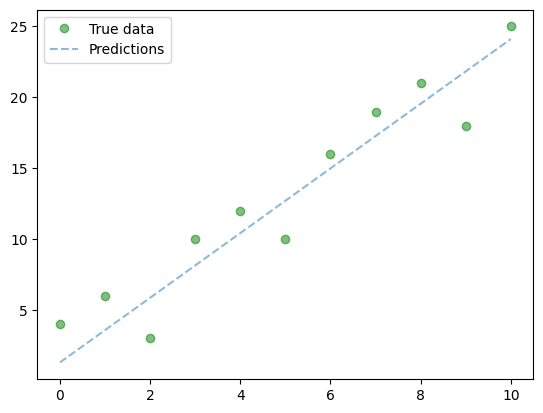

In [14]:
from matplotlib import pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.savefig('workdir/plot1.png')
plt.show()

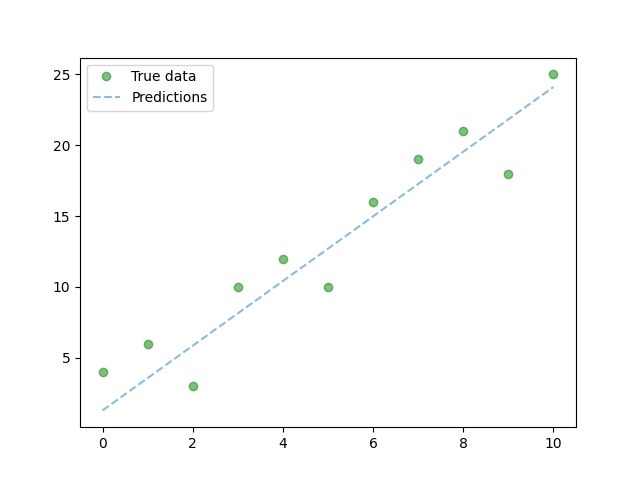

In [15]:
from IPython.display import Image, display

display(Image('workdir/plot1.png'))

In [16]:
%download plot1.png

Downloading...
File downloaded.


In [1]:
%disconnect

No connected provider